# Questions

#### 1. How have won more games at home or away?
#### 2. Which teams have scored the most points, both at home and away?
#### 3. How many games have the different teams won at home and away?
#### 4. How have the points scored behaved over the years?
#### 5. Against which teams have they won the most home and away?

In [105]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
# 1. Extract data from document excel (csv). [games]

games = pd.read_csv(r"C:\Users\ilcap\Desktop\Proyectos\Proyecto 3 Jugadores NBA\games.csv")
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [7]:
# 2. See info about "games"

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [8]:
# 3.  Select columns

games = games[["GAME_DATE_EST","GAME_ID","GAME_STATUS_TEXT","TEAM_ID_home","PTS_away","TEAM_ID_away","PTS_home","HOME_TEAM_WINS"]]
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_away,TEAM_ID_away,PTS_home,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,117.0,1610612759,126.0,1
1,2022-12-22,22200478,Final,1610612762,112.0,1610612764,120.0,1
2,2022-12-21,22200466,Final,1610612739,106.0,1610612749,114.0,1
3,2022-12-21,22200467,Final,1610612755,93.0,1610612765,113.0,1
4,2022-12-21,22200468,Final,1610612737,110.0,1610612741,108.0,0


In [9]:
# "GAME_DATE_EST" its dtype is 'object':
# 3.1 Become, dtype: 'object' to 'datetime'

games ['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])
games.loc[:, 'GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

In [10]:
games.info()

# 3.2 Dtype has became to 'datetime'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   TEAM_ID_home      26651 non-null  int64         
 4   PTS_away          26552 non-null  float64       
 5   TEAM_ID_away      26651 non-null  int64         
 6   PTS_home          26552 non-null  float64       
 7   HOME_TEAM_WINS    26651 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.6+ MB


In [11]:
# 4 Create new column with the name 'year'

games['year'] = games['GAME_DATE_EST'].dt.year
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_away,TEAM_ID_away,PTS_home,HOME_TEAM_WINS,year
0,2022-12-22,22200477,Final,1610612740,117.0,1610612759,126.0,1,2022
1,2022-12-22,22200478,Final,1610612762,112.0,1610612764,120.0,1,2022
2,2022-12-21,22200466,Final,1610612739,106.0,1610612749,114.0,1,2022
3,2022-12-21,22200467,Final,1610612755,93.0,1610612765,113.0,1,2022
4,2022-12-21,22200468,Final,1610612737,110.0,1610612741,108.0,0,2022


In [12]:
# 5 Extract data from document excel (csv). [teams]

teams = pd.read_csv(r"C:\Users\ilcap\Desktop\Proyectos\Proyecto 3 Jugadores NBA\teams.csv")
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [13]:
# 6. Select columns 

teams = teams[["TEAM_ID","NICKNAME","CITY"]]
teams.head()

,TEAM_ID,NICKNAME,CITY
0,1610612737,Hawks,Atlanta
1,1610612738,Celtics,Boston
2,1610612740,Pelicans,New Orleans
3,1610612741,Bulls,Chicago
4,1610612742,Mavericks,Dallas


In [14]:
# 7. Union games and teams from home (inner)

home_games = pd.merge(games, teams, left_on = 'TEAM_ID_home', right_on = 'TEAM_ID', how = 'inner')
home_games.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_away,TEAM_ID_away,PTS_home,HOME_TEAM_WINS,year,TEAM_ID,NICKNAME,CITY
0,2022-12-22,22200477,Final,1610612740,117.0,1610612759,126.0,1,2022,1610612740,Pelicans,New Orleans
1,2022-12-19,22200457,Final,1610612740,128.0,1610612749,119.0,0,2022,1610612740,Pelicans,New Orleans
2,2022-12-11,22200395,Final,1610612740,124.0,1610612756,129.0,1,2022,1610612740,Pelicans,New Orleans
3,2022-12-09,22200384,Final,1610612740,117.0,1610612756,128.0,1,2022,1610612740,Pelicans,New Orleans
4,2022-12-07,22200371,Final,1610612740,98.0,1610612765,104.0,1,2022,1610612740,Pelicans,New Orleans


In [15]:
#8 Rename columns (teams home)

home_games = home_games.rename(columns = {"CITY" : "CITY_HOME", "NICKNAME" : "NICKNAME_HOME"})
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_away,TEAM_ID_away,PTS_home,HOME_TEAM_WINS,year,TEAM_ID,NICKNAME_HOME,CITY_HOME
0,2022-12-22,22200477,Final,1610612740,117.0,1610612759,126.0,1,2022,1610612740,Pelicans,New Orleans
1,2022-12-19,22200457,Final,1610612740,128.0,1610612749,119.0,0,2022,1610612740,Pelicans,New Orleans
2,2022-12-11,22200395,Final,1610612740,124.0,1610612756,129.0,1,2022,1610612740,Pelicans,New Orleans
3,2022-12-09,22200384,Final,1610612740,117.0,1610612756,128.0,1,2022,1610612740,Pelicans,New Orleans
4,2022-12-07,22200371,Final,1610612740,98.0,1610612765,104.0,1,2022,1610612740,Pelicans,New Orleans


In [16]:
#9 Union games and teams from away (inner)

both_games = pd.merge(home_games, teams, left_on = 'TEAM_ID_away', right_on = 'TEAM_ID', how = 'inner')
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_away,TEAM_ID_away,PTS_home,HOME_TEAM_WINS,year,TEAM_ID_x,NICKNAME_HOME,CITY_HOME,TEAM_ID_y,NICKNAME,CITY
0,2022-12-22,22200477,Final,1610612740,117.0,1610612759,126.0,1,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
1,2022-04-13,52100131,Final,1610612740,103.0,1610612759,113.0,1,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
2,2022-03-26,22101107,Final,1610612740,107.0,1610612759,103.0,0,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
3,2022-02-12,22100848,Final,1610612740,124.0,1610612759,114.0,0,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
4,2021-04-24,22000264,Final,1610612740,110.0,1610612759,108.0,0,2021,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio


In [17]:
#10 Rename columns (teams away)

both_games = both_games.rename(columns = {"CITY" : "CITY_AWAY", "NICKNAME" : "NICKNAME_AWAY"})
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,PTS_away,TEAM_ID_away,PTS_home,HOME_TEAM_WINS,year,TEAM_ID_x,NICKNAME_HOME,CITY_HOME,TEAM_ID_y,NICKNAME_AWAY,CITY_AWAY
0,2022-12-22,22200477,Final,1610612740,117.0,1610612759,126.0,1,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
1,2022-04-13,52100131,Final,1610612740,103.0,1610612759,113.0,1,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
2,2022-03-26,22101107,Final,1610612740,107.0,1610612759,103.0,0,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
3,2022-02-12,22100848,Final,1610612740,124.0,1610612759,114.0,0,2022,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio
4,2021-04-24,22000264,Final,1610612740,110.0,1610612759,108.0,0,2021,1610612740,Pelicans,New Orleans,1610612759,Spurs,San Antonio


In [18]:
#11 Drop columns we don't need

both_games = both_games.drop(columns=['TEAM_ID_home','TEAM_ID_away','TEAM_ID_x','TEAM_ID_y'])
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,PTS_away,PTS_home,HOME_TEAM_WINS,year,NICKNAME_HOME,CITY_HOME,NICKNAME_AWAY,CITY_AWAY
0,2022-12-22,22200477,Final,117.0,126.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio
1,2022-04-13,52100131,Final,103.0,113.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio
2,2022-03-26,22101107,Final,107.0,103.0,0,2022,Pelicans,New Orleans,Spurs,San Antonio
3,2022-02-12,22100848,Final,124.0,114.0,0,2022,Pelicans,New Orleans,Spurs,San Antonio
4,2021-04-24,22000264,Final,110.0,108.0,0,2021,Pelicans,New Orleans,Spurs,San Antonio


In [19]:
#12 Create a copy (games)
#12.1 Change headers in lowercase letter

games = both_games.copy()
games.columns = games.columns.str.lower()
games.head()

,game_date_est,game_id,game_status_text,pts_away,pts_home,home_team_wins,year,nickname_home,city_home,nickname_away,city_away
0,2022-12-22,22200477,Final,117.0,126.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio
1,2022-04-13,52100131,Final,103.0,113.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio
2,2022-03-26,22101107,Final,107.0,103.0,0,2022,Pelicans,New Orleans,Spurs,San Antonio
3,2022-02-12,22100848,Final,124.0,114.0,0,2022,Pelicans,New Orleans,Spurs,San Antonio
4,2021-04-24,22000264,Final,110.0,108.0,0,2021,Pelicans,New Orleans,Spurs,San Antonio


In [20]:
#### Data Analysis ####
#13 Create new column adding points (pts_away anda pts_home)

games['total points'] = games['pts_away'] + games['pts_home']
games.head()

,game_date_est,game_id,game_status_text,pts_away,pts_home,home_team_wins,year,nickname_home,city_home,nickname_away,city_away,total points
0,2022-12-22,22200477,Final,117.0,126.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio,243.0
1,2022-04-13,52100131,Final,103.0,113.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio,216.0
2,2022-03-26,22101107,Final,107.0,103.0,0,2022,Pelicans,New Orleans,Spurs,San Antonio,210.0
3,2022-02-12,22100848,Final,124.0,114.0,0,2022,Pelicans,New Orleans,Spurs,San Antonio,238.0
4,2021-04-24,22000264,Final,110.0,108.0,0,2021,Pelicans,New Orleans,Spurs,San Antonio,218.0


In [21]:
# 14 Top 5 games with more ponint

games.nlargest(n=5, columns = 'total points')

,game_date_est,game_id,game_status_text,pts_away,pts_home,home_team_wins,year,nickname_home,city_home,nickname_away,city_away,total points
8301,2019-03-01,21800928,Final,168.0,161.0,0,2019,Hawks,Atlanta,Bulls,Chicago,329.0
1994,2006-12-07,20600271,Final,161.0,157.0,0,2006,Nets,Brooklyn,Suns,Phoenix,318.0
10704,2019-10-30,21900061,Final,159.0,158.0,0,2019,Wizards,Washington,Rockets,Houston,317.0
835,2022-02-25,22100899,Final,157.0,153.0,0,2022,Wizards,Washington,Spurs,San Antonio,310.0
10577,2020-07-31,21901238,Final,153.0,149.0,0,2020,Mavericks,Dallas,Rockets,Houston,302.0


In [22]:
# 15 Top 5 games with less ponints

games.nsmallest(n=5, columns = 'total points')

,game_date_est,game_id,game_status_text,pts_away,pts_home,home_team_wins,year,nickname_home,city_home,nickname_away,city_away,total points
23366,2007-10-19,10700072,Final,33.0,36.0,1,2007,Celtics,Boston,Nets,Brooklyn,69.0
8684,2003-10-08,10300012,Final,58.0,62.0,1,2003,Pacers,Indiana,Bulls,Chicago,120.0
10973,2004-11-09,20400049,Final,60.0,64.0,1,2004,Nets,Brooklyn,Trail Blazers,Portland,124.0
12987,2005-03-13,20400927,Final,62.0,64.0,1,2005,Pistons,Detroit,Jazz,Utah,126.0
4857,2003-11-01,20300031,Final,56.0,73.0,1,2003,Timberwolves,Minnesota,Raptors,Toronto,129.0


# Graphics

In [23]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# 16 Import libraries 

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# 17 View total home game wins (and visitor game wins)

total = games['home_team_wins'].value_counts()
total

home_team_wins
1    15645
0    11006
Name: count, dtype: int64

##### 1 = Home
##### 0 = Visitor

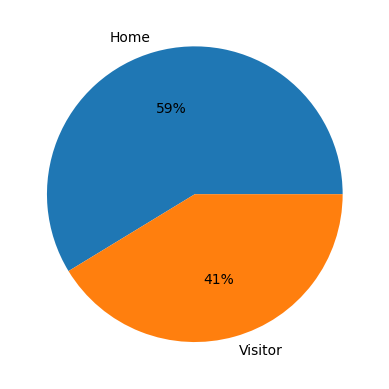

In [26]:
# 18 Create a graph on total wins in home games and total wins in away games

plt.pie(total.values, labels =['Home', 'Visitor'], autopct='%.0f%%')
plt.show()
# autopct='%.0f%%' == Show percentage

In [27]:
import numpy as np

C:\Users\ilcap\AppData\Local\Temp\ipykernel_6584\1453833037.py:6: FutureWarning: The provided callable <function mean at 0x000001F35A4E1EE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  result = home_wins.groupby('nickname_home')["pts_home"].aggregate(np.mean).reset_index().sort_values('pts_home')
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


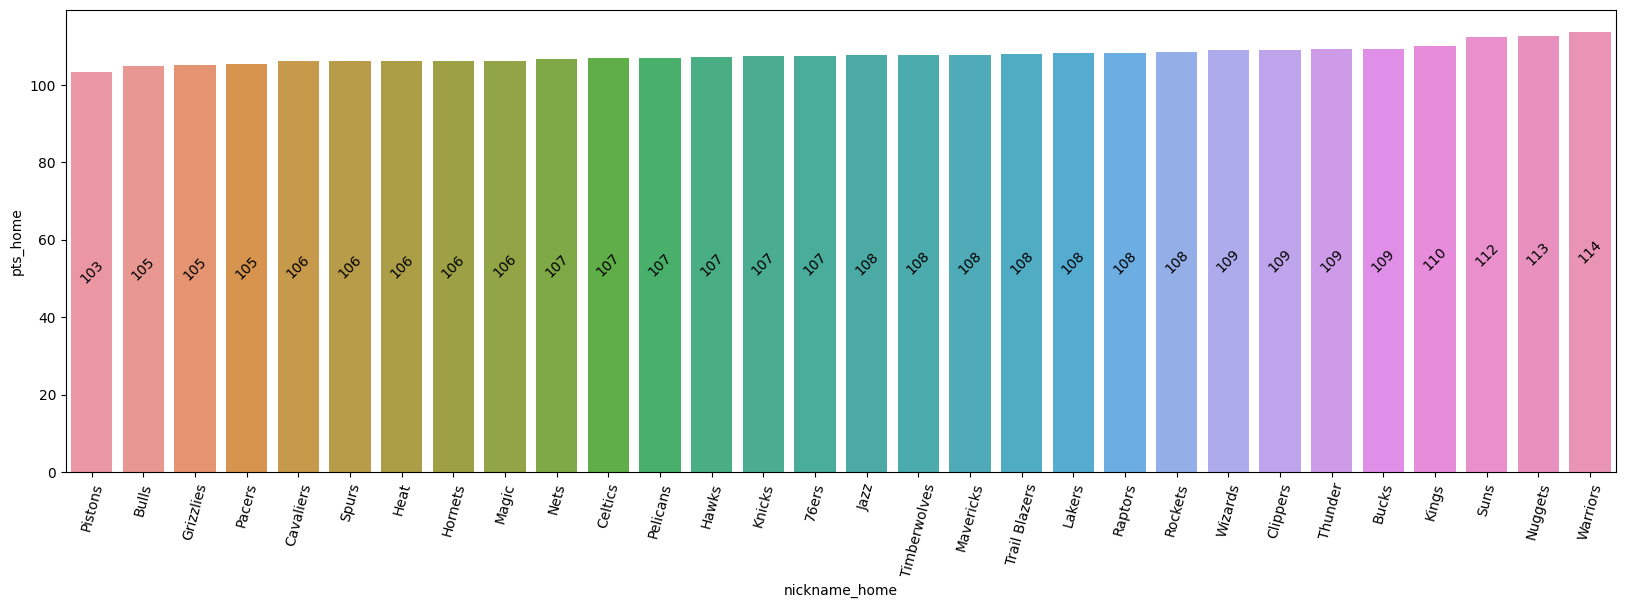

In [28]:
# 19 Amount of points per team playing at home or away
# This table is for home

plt.figure(figsize=(20,6))
home_wins = games[games['home_team_wins'] == 1]
result = home_wins.groupby('nickname_home')["pts_home"].aggregate(np.mean).reset_index().sort_values('pts_home')

ax = sns.barplot(data=home_wins, x = 'nickname_home', y = 'pts_home', order = result['nickname_home'], errorbar = None)
ax.bar_label(ax.containers[-1], fmt= '%.0f', label_type = 'center', rotation=45)
plt.xticks(rotation=75)
plt.show()

C:\Users\ilcap\AppData\Local\Temp\ipykernel_6584\2782704643.py:5: FutureWarning: The provided callable <function mean at 0x000001F35A4E1EE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  result = away_wins.groupby('nickname_away')["pts_away"].aggregate(np.mean).reset_index().sort_values('pts_away')
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


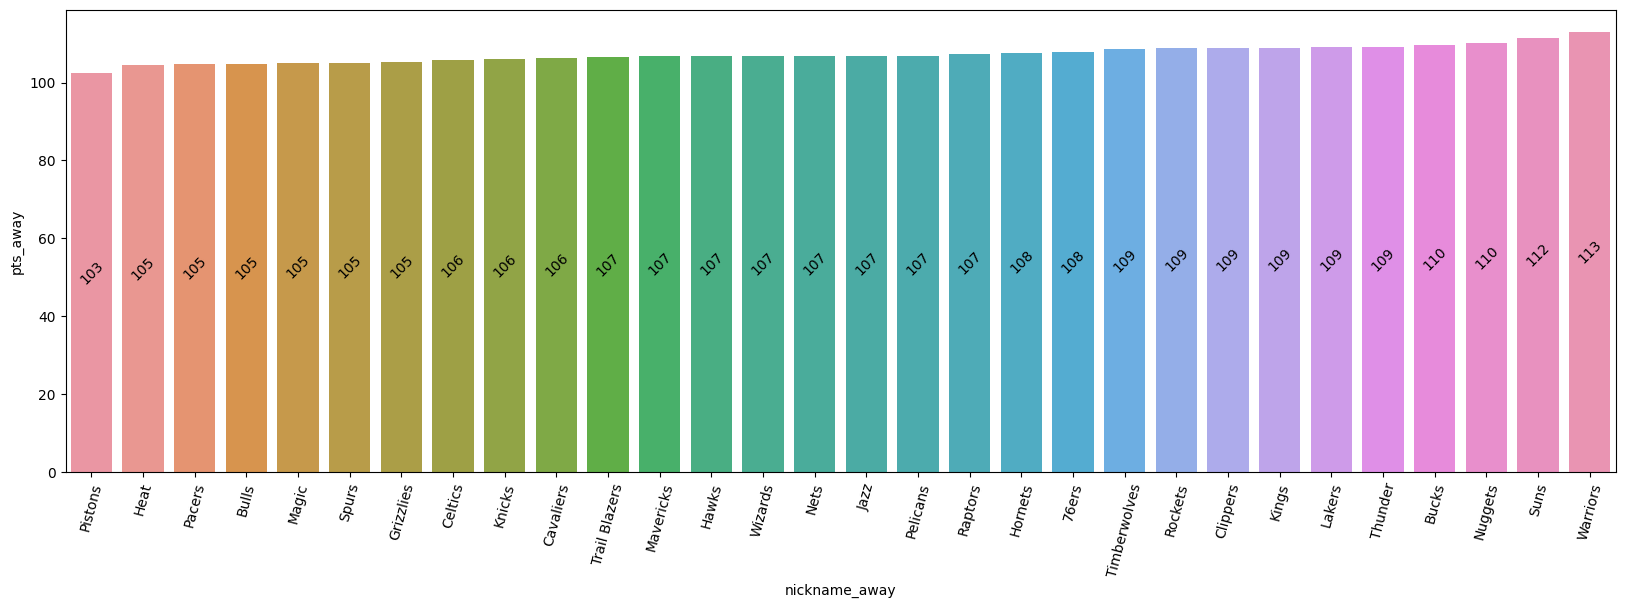

In [29]:
#20 This table is for away

plt.figure(figsize=(20,6))
away_wins = games[games['home_team_wins'] == 0]
result = away_wins.groupby('nickname_away')["pts_away"].aggregate(np.mean).reset_index().sort_values('pts_away')

ax = sns.barplot(data=away_wins, x = 'nickname_away', y = 'pts_away', order = result['nickname_away'], errorbar = None)
ax.bar_label(ax.containers[-1], fmt= '%.0f', label_type = 'center', rotation=45)
plt.xticks(rotation=75)
plt.show()

C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total points', ylabel='Count'>

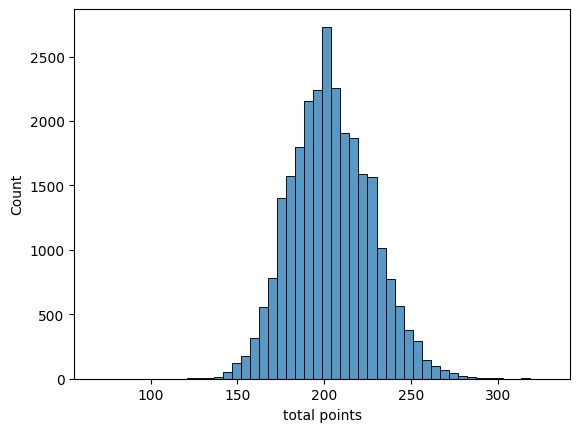

In [38]:
#21 Games information general 
# Histograma

sns.histplot(data= games, x= "total points", bins= 50)


C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='total points'>

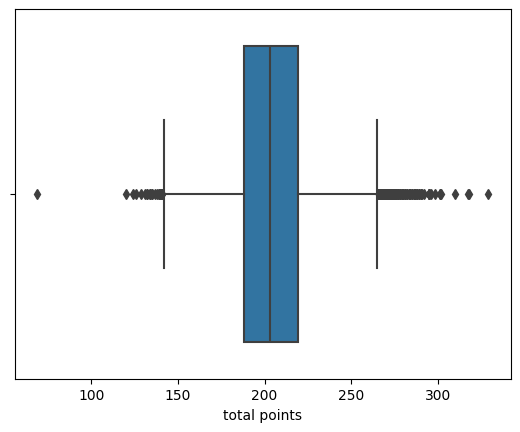

In [40]:
#22 Watch points information
sns.boxplot(x=games["total points"])

In [41]:
# There's a big difference between the game with less points and other games, happen something unusual, we need to investigate

C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


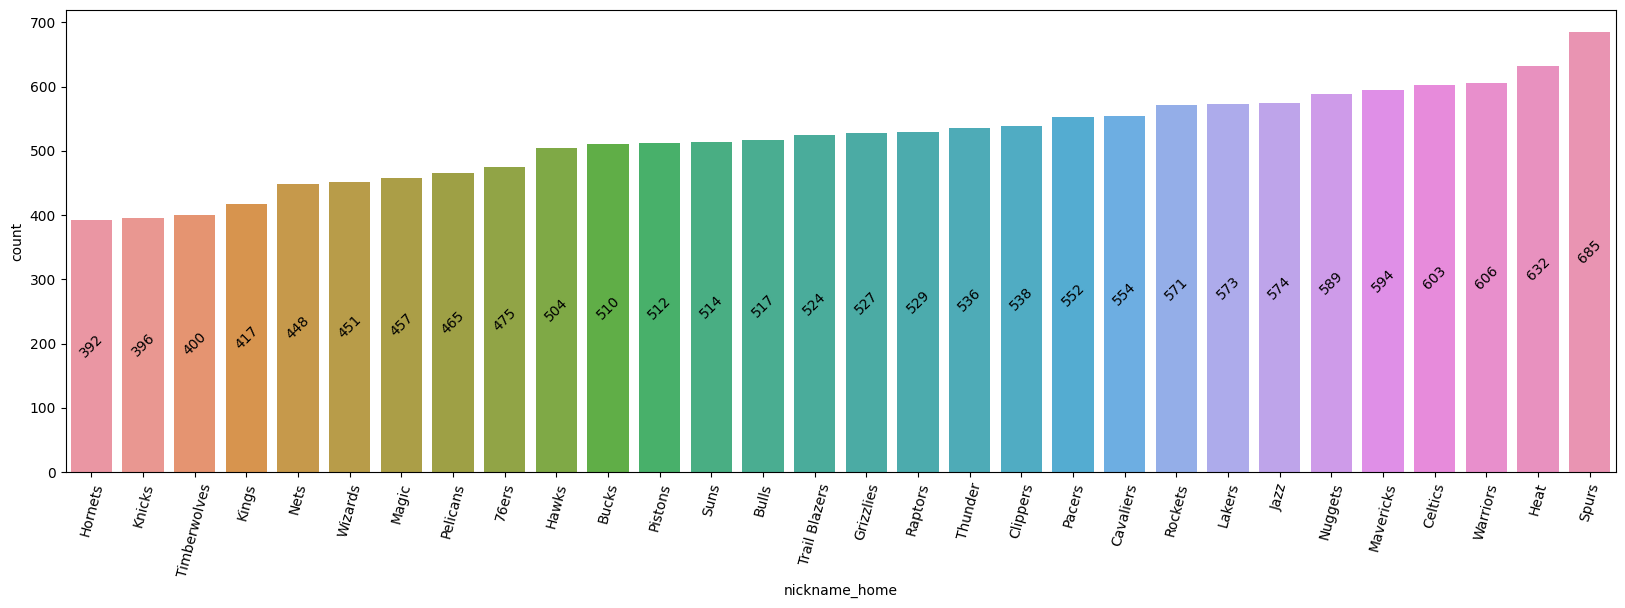

In [53]:
#23 We are going to make a table where the teams that have won the most games are (In Home)

plt.figure(figsize=(20,6))

result = home_wins["nickname_home"].value_counts().sort_values()

ax = sns.countplot (x="nickname_home", data=home_wins, order = result.index)
ax.bar_label(ax.containers[-1], label_type = "center", rotation = 45)

plt.xticks(rotation = 75)
plt.show()

C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


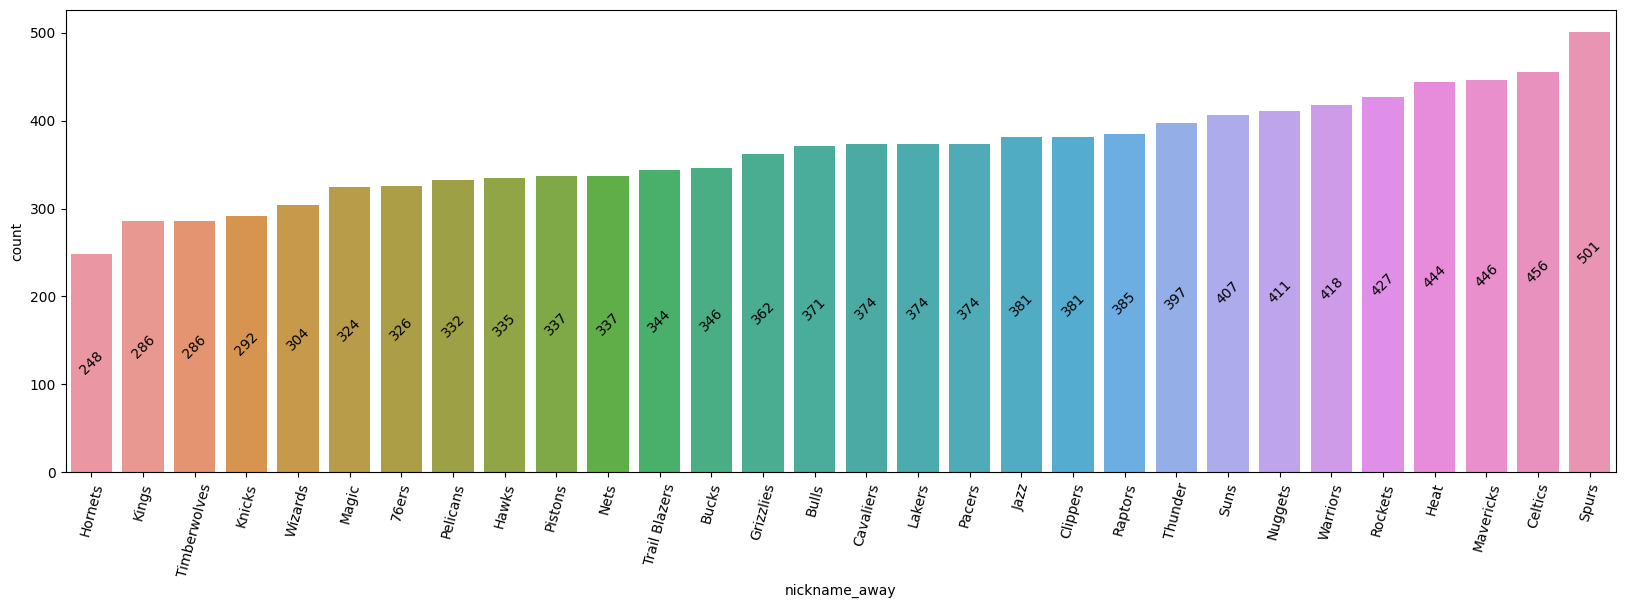

In [54]:
#24 We are going to make another table where the teams that have won the most games are (In Away)

plt.figure(figsize=(20,6))

result = away_wins["nickname_away"].value_counts().sort_values()

ax = sns.countplot (x="nickname_away", data=away_wins, order = result.index)
ax.bar_label(ax.containers[-1], label_type = "center", rotation = 45)

plt.xticks(rotation = 75)
plt.show()

In [55]:
#25 average points earned per year

games.groupby("year")["total points"].mean()

year
2003    184.475269
2004    188.379151
2005    193.944251
2006    195.553411
2007    196.871795
2008    198.470180
2009    200.169468
2010    199.734637
2011    197.679781
2012    192.825949
2013    197.085196
2014    201.815406
2015    200.326991
2016    207.307908
2017    211.543402
2018    216.689580
2019    221.965465
2020    224.262899
2021    221.128160
2022    224.392377
Name: total points, dtype: float64

C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<function matplotlib.pyplot.show(close=None, block=None)>

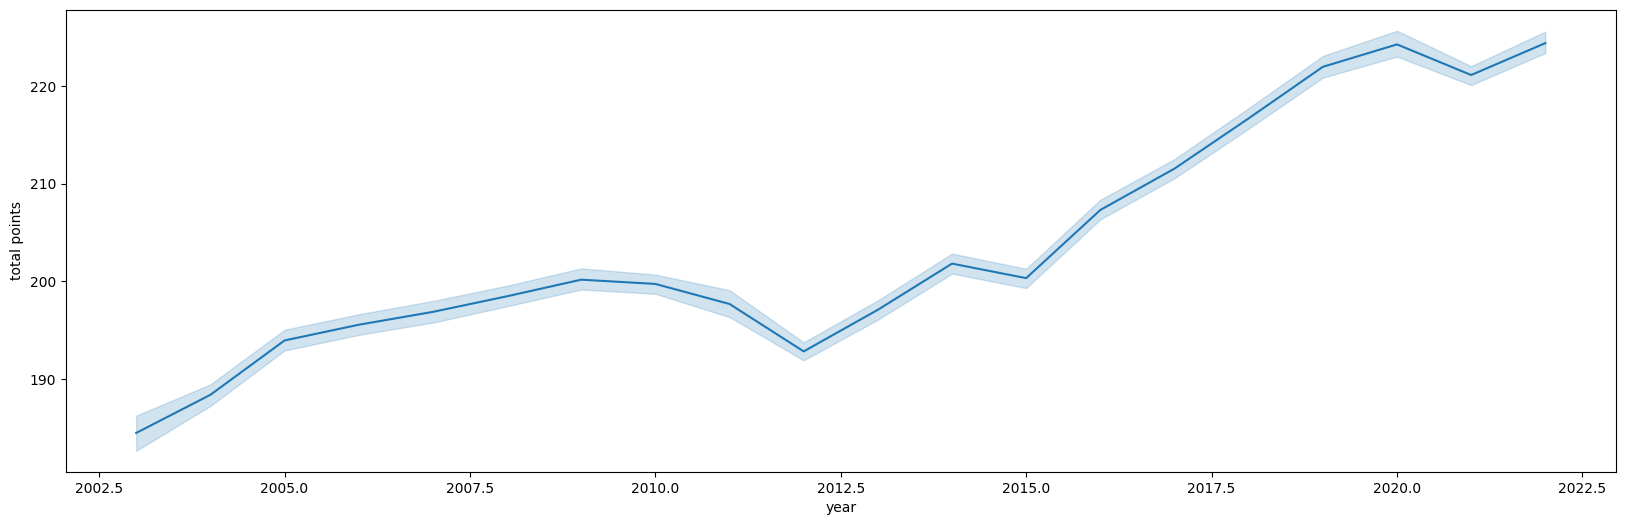

In [56]:
#25.1 Graphic for average points earned per year

plt.figure(figsize=(20,6))
ax = sns.lineplot(data=games, x = "year", y = "total points")
plt.show

C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ilcap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<function matplotlib.pyplot.show(close=None, block=None)>

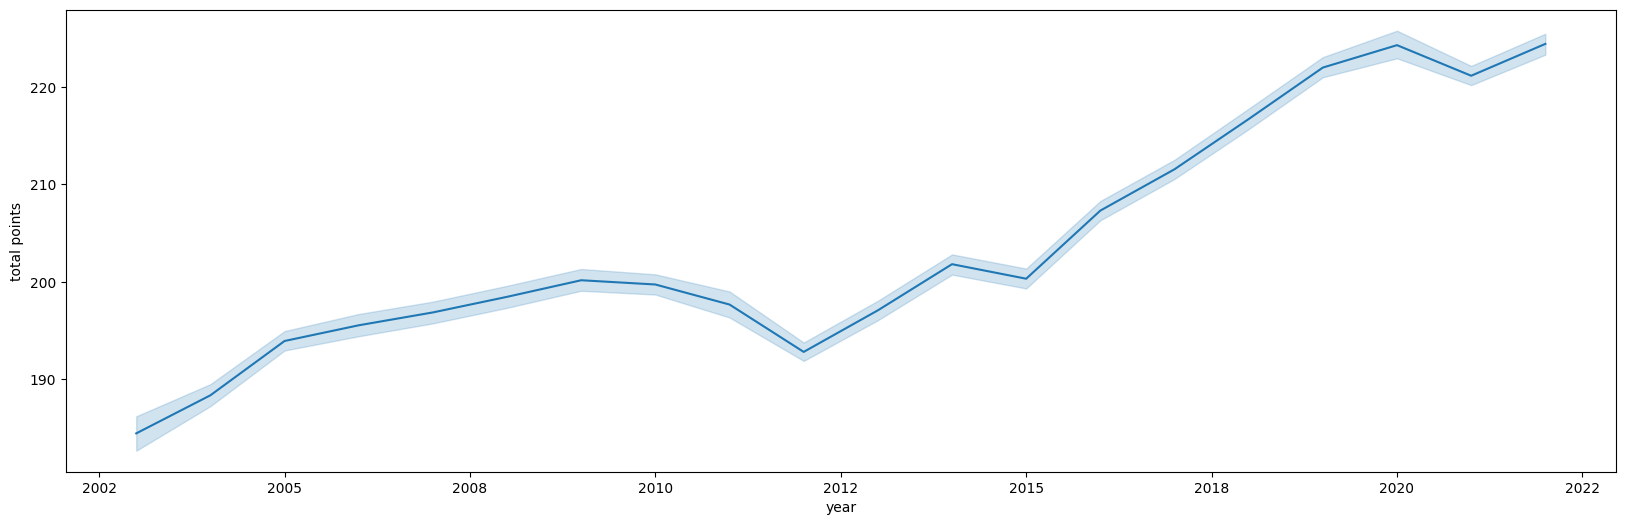

In [57]:
#25.2 axis x have year with decimal, we need eliminate it

plt.figure(figsize=(20,6))
ax = sns.lineplot(data=games, x = "year", y = "total points")

def format_xlabels(value, pos):
    return str(int(round(value)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xlabels))

plt.show

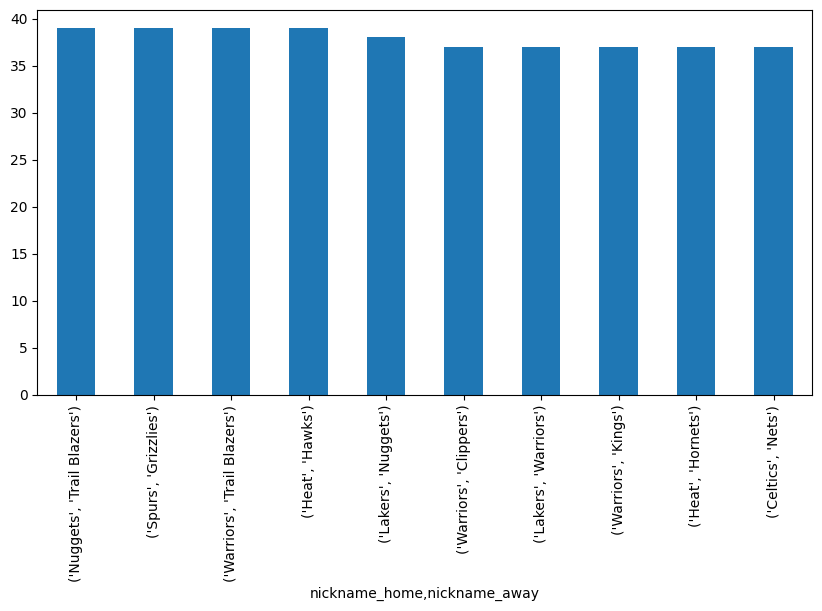

In [59]:
#26 Games have won in home per team

x = home_wins[["nickname_home", "nickname_away"]].value_counts()

ax = x[:10].plot(kind = "bar", figsize=[10,5])
ax.set_xticklabels(x.index[:10], rotation = 90)

plt.show()

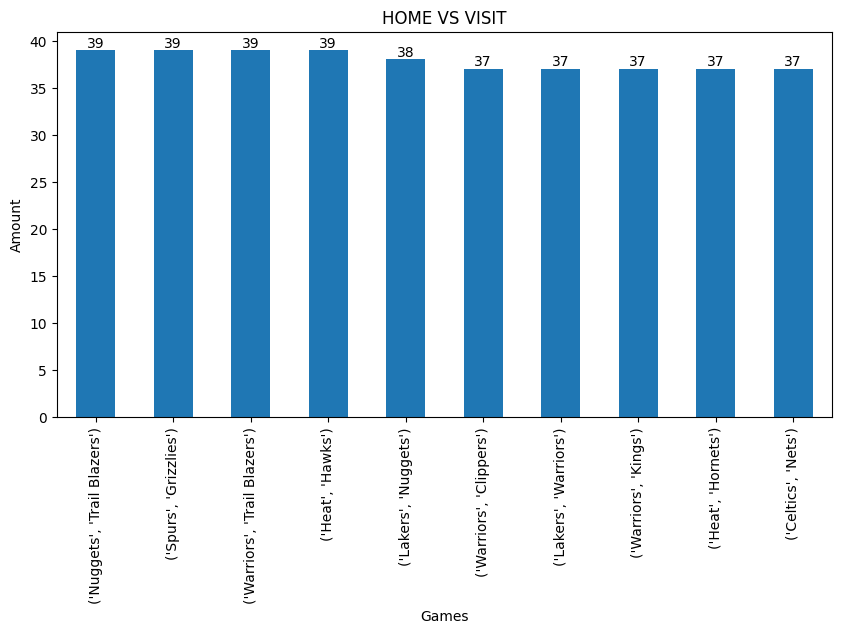

In [66]:
#26.1 Add title
#26.1 Add label (X and Y)
#26.1 Add amount 
#26.1 And give format

x = home_wins[["nickname_home", "nickname_away"]].value_counts()

ax = x[:10].plot(kind = "bar", figsize=[10,5])
ax.set_title("HOME VS VISIT")
ax.set_xlabel("Games")
ax.set_ylabel("Amount")
ax.set_xticklabels(x.index[:10], rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha = "center", va = "bottom")

plt.show()

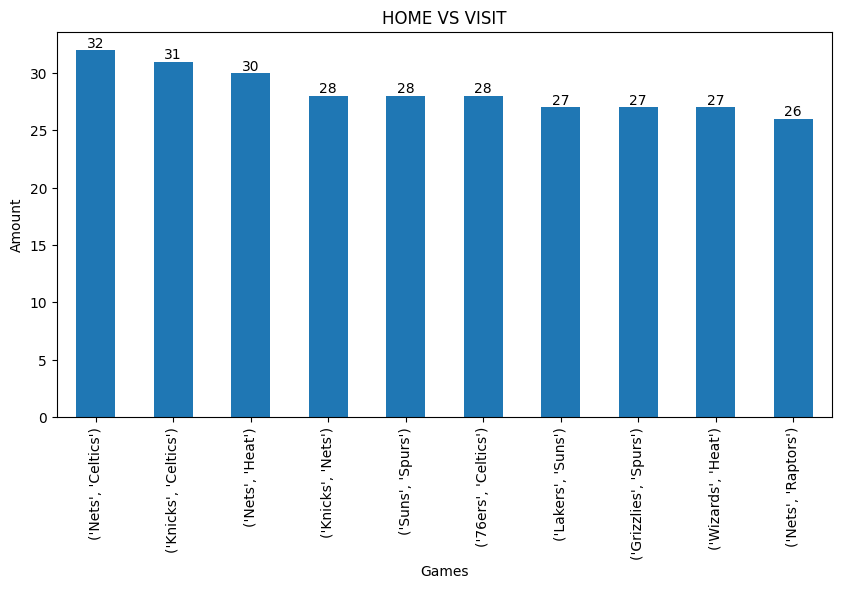

In [67]:
#27 Games have won in away per team

x = away_wins[["nickname_home", "nickname_away"]].value_counts()

ax = x[:10].plot(kind = "bar", figsize=[10,5])
ax.set_title("HOME VS VISIT")
ax.set_xlabel("Games")
ax.set_ylabel("Amount")
ax.set_xticklabels(x.index[:10], rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha = "center", va = "bottom")

plt.show()

In [98]:
#28 Read file games_details

game_details = pd.read_csv(r"C:\Users\ilcap\Desktop\Proyectos\Proyecto 3 Jugadores NBA\games_details.csv")
game_details

C:\Users\ilcap\AppData\Local\Temp\ipykernel_6584\3056781052.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  game_details = pd.read_csv(r"C:\Users\ilcap\Desktop\Proyectos\Proyecto 3 Jugadores NBA\games_details.csv")


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [99]:
#29 Get information about "game_details"

game_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [100]:
#30 Select columns

game_details = game_details[["PLAYER_NAME", "GAME_ID", "PTS"]]
game_details

,PLAYER_NAME,GAME_ID,PTS
0,Romeo Langford,22200477,2.0
1,Jeremy Sochan,22200477,23.0
2,Jakob Poeltl,22200477,13.0
3,Devin Vassell,22200477,10.0
4,Tre Jones,22200477,19.0
...,...,...,...
668623,Jordan Hamilton,11200005,17.0
668624,Kenneth Faried,11200005,18.0
668625,Kosta Koufos,11200005,6.0
668626,Timofey Mozgov,11200005,2.0


In [101]:
#31 Get information about "games"

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   game_date_est     26651 non-null  datetime64[ns]
 1   game_id           26651 non-null  int64         
 2   game_status_text  26651 non-null  object        
 3   pts_away          26552 non-null  float64       
 4   pts_home          26552 non-null  float64       
 5   home_team_wins    26651 non-null  int64         
 6   year              26651 non-null  int32         
 7   nickname_home     26651 non-null  object        
 8   city_home         26651 non-null  object        
 9   nickname_away     26651 non-null  object        
 10  city_away         26651 non-null  object        
 11  total points      26552 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(5)
memory usage: 2.3+ MB


In [102]:
#32 Join "games" and "game_details"

games_complete = pd.merge(game_details, games, left_on = 'GAME_ID', right_on = 'game_id', how = 'inner')
games_complete.head()

,PLAYER_NAME,GAME_ID,PTS,game_date_est,game_id,game_status_text,pts_away,pts_home,home_team_wins,year,nickname_home,city_home,nickname_away,city_away,total points
0,Romeo Langford,22200477,2.0,2022-12-22,22200477,Final,117.0,126.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio,243.0
1,Jeremy Sochan,22200477,23.0,2022-12-22,22200477,Final,117.0,126.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio,243.0
2,Jakob Poeltl,22200477,13.0,2022-12-22,22200477,Final,117.0,126.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio,243.0
3,Devin Vassell,22200477,10.0,2022-12-22,22200477,Final,117.0,126.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio,243.0
4,Tre Jones,22200477,19.0,2022-12-22,22200477,Final,117.0,126.0,1,2022,Pelicans,New Orleans,Spurs,San Antonio,243.0


In [106]:
#33 PTS of every player in all years

player_pts = games_complete.groupby(["year", "PLAYER_NAME"])["PTS"].mean().reset_index().sort_values("year")
player_pts.head(10)

,year,PLAYER_NAME,PTS
0,2003,A.J. Guyton,4.000000
307,2003,Nazr Mohammed,6.382353
306,2003,Morris Peterson,7.032258
305,2003,Moochie Norris,2.843750
304,2003,Monty Williams,2.000000
303,2003,Mo Williams,4.833333
302,2003,Mitchell Butler,2.714286
301,2003,Milt Palacio,4.880000
300,2003,Mikki Moore,1.000000
299,2003,Mike Wilks,2.285714


In [107]:
#34 Top 10 Players with more points in 2022

player_pts[player_pts["year"] == 2022].sort_values(by = "PTS", ascending= False).head(10)

,year,PLAYER_NAME,PTS
11862,2022,Giannis Antetokounmpo,31.358974
11978,2022,Joel Embiid,31.166667
12094,2022,Luka Doncic,30.644444
12266,2022,Shai Gilgeous-Alexander,29.074074
12050,2022,Kevin Durant,29.029851
12081,2022,LeBron James,28.741379
11899,2022,Ja Morant,28.000000
11960,2022,Jayson Tatum,27.880000
11799,2022,Devin Booker,27.750000
12306,2022,Trae Young,27.333333
